In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
house_data = sklearn.datasets.fetch_california_housing()
print(house_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
df = pd.DataFrame(house_data.data, columns=house_data.feature_names)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df['prices'] = house_data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.shape

(20640, 9)

In [6]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
prices,0


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prices
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# using correlation

corr = df.corr()

<Axes: >

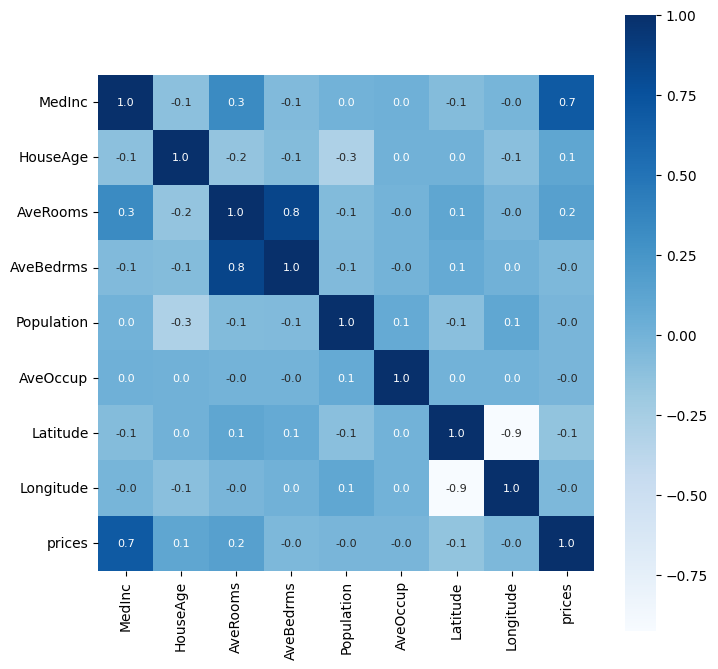

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,cmap='Blues',square=True,annot=True,fmt='.1f',annot_kws={'size':8})

In [10]:
# spliting the data
x = df.drop(['prices'] , axis=1)
y = df['prices']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

print(x.shape,x_train.shape,x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [12]:
# train the model using training data
model = XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
# save the model

import pickle
filename = 'final_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# prediction of training data
training_prediction = model.predict(x_train)

print(training_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [ ]:
# using metrics
score_1 = metrics.r2_score(y_train, training_prediction)
score_2 = metrics.mean_absolute_error(y_train, training_prediction)

print("R squared error : ", score_1)
print("Mean Absolute Error : ", score_2)

R squared error :  0.943650140819218
Mean Absolute Error :  0.1933648700612105


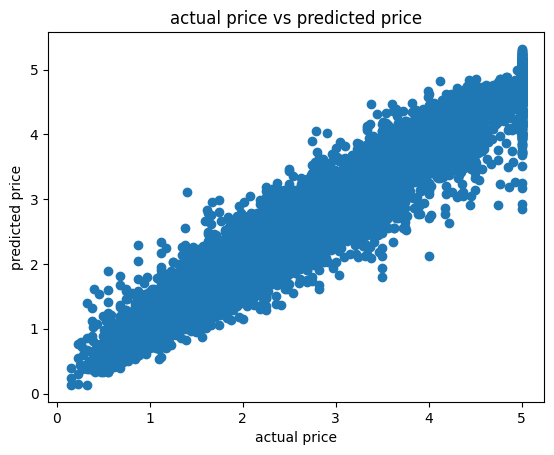

In [ ]:
# visulized the actual and predicted price
plt.scatter(y_train, training_prediction)
plt.title('actual price vs predicted price')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.show()

In [ ]:
# prediction of test  data
test_predtiction = model.predict(x_test)

print(test_predtiction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [ ]:
# metrics
score_3 = metrics.r2_score(y_test , test_predtiction)
score_4 = metrics.mean_absolute_error(y_test, test_predtiction)

print("R squared error : ", score_3)
print("Mean Absolute Error : ", score_4)

R squared error :  0.8338000331788725
Mean Absolute Error :  0.3108631800268186


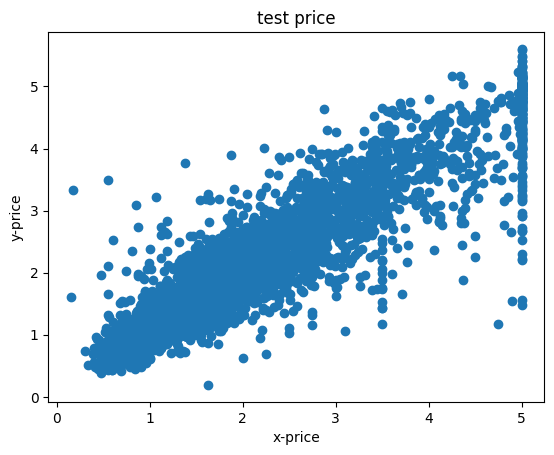

In [ ]:
plt.scatter(y_test, test_predtiction)
plt.title('test price')
plt.xlabel('x-price')
plt.ylabel('y-price')
plt.show()